**An efficient solver for the Two-Sum problem** 

**Author: Tanzid Sultan**

**Problem statement:** Given a sorted array of integers `A[]`, our goal is two find a pair of integers `a_1` and `a_2` from this array which satisfy `a_1 + a_2 = k`, for some given integer `k`. 

Below is a function, called `TwoSumMoreImproved`, implementing an 0(n) time-complexity algorithm for solving this problem. The inputs consist of `A[]` and `k`. The function returns `True` and a pair of integers `(a_1, a_2)` for which `a_1 + a_2 = k`. If no such pair exists, the function returns `False` and the pair of integers `(-1,-1)`.

In [71]:
import math

def TwoSumMoreImproved(A,k):
   
    # transform the array
    Ap = []
    for i in range(len(A)):
        Ap.append(A[i] - k/2)

    # find all distinct elements
    distinct = list(set(Ap))

    # initialize dictionary
    B = dict()
    for i in range(len(distinct)):
        key = abs(distinct[i]) 
        B[key] = 0

    # search for identical zeros (i.e. a1 = a2)
    j = BinSearch(Ap, 0, len(Ap), 0)
    if(j != -1):
        if((Ap[j-1] == 0 and j > 0) or (Ap[j+1] == 0 and j < len(Ap))):
            return True, k/2, k/2    

    # search for non-identical solutions of two sum problem (i.e. a1 =/= a2)
    for i in range(len(Ap)):

        if (i == 0):
            key = abs(Ap[i])
            B[key] += 1

        if(i > 0):
            # exclude duplicate items from the count
            if(Ap[i-1] != Ap[i]):
                # increment the count of absolute value of the item
                key = abs(Ap[i])
                B[key] += 1
                # check if any item has count greater than 1 
                if (B[key] > 1):
                    return True, key + k/2, -key + k/2

    return False, -1, -1


def BinSearch(A, lo, hi, key):
  
    if lo > hi:
        return -1

    mid = math.floor(lo + (hi-lo)/2)

    if(A[mid] == key):
        return mid
    elif(key <  A[mid]):
        return BinSearch(A, lo, mid-1, key)
    elif(key > A[mid]):
        return BinSearch(A, mid+1, hi, key)    



We will later compare the efficiency of our algorithm with two other algorithms with lower worst-case performance: A `brute-force` algorithm which has theoretical time-complexity of `O(n^2)` and an `improved` algorithm with `0(n log n)` time-complexity. 

In [72]:
def TwoSumBrute(A, k):

    for i in range(len(A)-1):
        for j in range(len(A)-1-i):
            if((A[i] + A[i+j+1]) == k):
                return True, A[i], A[i+j+1]
    
    return False, -1, -1   
    

def TwoSumImproved(A, k):

    for i in range(len(A)):
        a1 = A[i]
        a2 = k-a1
        j = BinSearch(A,0,len(A)-1,a2)
        if(j != -1):
            return True, A[i], A[j]

    return False, -1, -1        

***Testing*** our O(n) function for solving two sum problem for the following given inputs:

In [74]:
A = [4, 9, 12, 13, 15, 19, 20, 35, 44, 51, 51, 65, 97, 205, 317, 368, 409, 470, 800, 967, 
     1055, 1200, 1559, 8002]

k = 8006
print(f"Solution of Two Sum (more improved): {TwoSumMoreImproved(A,k)}")
print(f"Solution of Two Sum (improved): {TwoSumImproved(A,k)}")
print(f"Solution of Two Sum (brute force): {TwoSumBrute(A,k)}")

Solution of Two Sum (more improved): (True, 8002.0, 4.0)
Solution of Two Sum (improved): (True, 4, 8002)
Solution of Two Sum (brute force): (True, 4, 8002)


In [75]:
k = 102
print(f"Solution of Two Sum (more improved): {TwoSumMoreImproved(A,k)}")
print(f"Solution of Two Sum (improved): {TwoSumImproved(A,k)}")
print(f"Solution of Two Sum (brute force): {TwoSumBrute(A,k)}")

Solution of Two Sum (more improved): (True, 51.0, 51.0)
Solution of Two Sum (improved): (True, 51, 51)
Solution of Two Sum (brute force): (True, 51, 51)


In [76]:
k = 5
print(f"Solution of Two Sum (more improved): {TwoSumMoreImproved(A,k)}")
print(f"Solution of Two Sum (improved): {TwoSumImproved(A,k)}")
print(f"Solution of Two Sum (brute force): {TwoSumBrute(A,k)}")

Solution of Two Sum (more improved): (False, -1, -1)
Solution of Two Sum (improved): (False, -1, -1)
Solution of Two Sum (brute force): (False, -1, -1)


In [77]:
import random

random.seed(1)
A = sorted(random.sample(range(-1000,1000), 50))
k = random.sample(range(-1000,1000), 1)[0]
print(f"k = {k}")
print(f"Solution of Two Sum (more improved): {TwoSumMoreImproved(A,k)}")
print(f"Solution of Two Sum (improved): {TwoSumImproved(A,k)}")
print(f"Solution of Two Sum (brute force): {TwoSumBrute(A,k)}")

k = -136
Solution of Two Sum (more improved): (True, 735.0, -871.0)
Solution of Two Sum (improved): (True, -982, 846)
Solution of Two Sum (brute force): (True, -982, 846)


In [78]:
k = 600
print(f"Solution of Two Sum (more improved): {TwoSumMoreImproved(A,k)}")
print(f"Solution of Two Sum (improved): {TwoSumImproved(A,k)}")
print(f"Solution of Two Sum (brute force): {TwoSumBrute(A,k)}")

Solution of Two Sum (more improved): (False, -1, -1)
Solution of Two Sum (improved): (False, -1, -1)
Solution of Two Sum (brute force): (False, -1, -1)


***Estimation of worst-case time complexity:*** We test the algorithm for varying sizes of the input array and measure the program execution time. We use contrived input values for which a solution for the two-sum problem does not exist and maximum number of computations occur. We plot the results along with a linear best fit line.

In [49]:
import time

stats_n = []
stats_T = []
test_n = [1000, 10000, 100000, 500000, 1000000, 2500000, 5000000, 7500000, 
          10000000, 17500000, 25000000]

for n in test_n: 

    # size n sorted array of evenly spaced integers in the range [1,n+2)
    A = np.arange(1, n+2) 
    # target sum integer 
    k = 0 

    start = time.perf_counter_ns()
    solution = TwoSumMoreImproved(A,k)
    end = time.perf_counter_ns()
    stats_T.append((end - start)*1.e-9)
    print(f"n = {n}, Solution of Two Sum (more improved): {solution}, 
            execution time = {(end - start)*1.e-9}s")

    stats_n.append(n)


n = 1000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 0.0074527000000000005s
n = 10000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 0.0727348s
n = 100000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 0.37811120000000004s
n = 500000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 1.923578s
n = 1000000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 3.3010548s
n = 2500000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 8.307668600000001s
n = 5000000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 15.744422900000002s
n = 7500000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 23.714372700000002s
n = 10000000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 31.3678354s
n = 17500000, Solution of Two Sum (more improved): (False, -1, -1), execution time = 61.435986400000004

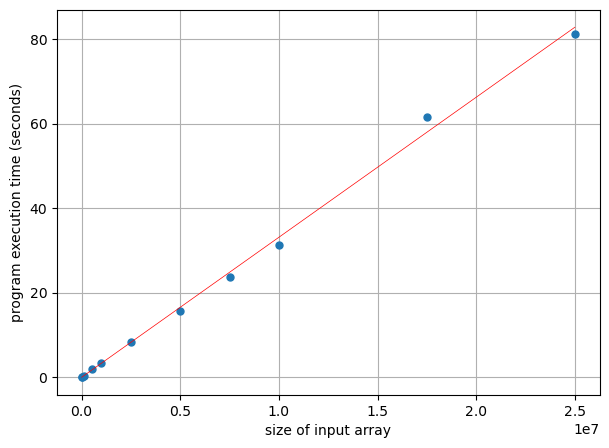

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# parameters of linear regression line
c = np.polyfit(stats_n, stats_T, 1)
lin_fit = [c[0]*n for n in stats_n]

plt.figure(figsize=(7,5))
plt.plot(stats_n, stats_T, 'o', markersize= 5)
plt.plot(stats_n, lin_fit, 'r', linewidth = 0.5)
plt.xlabel("size of input array")
plt.ylabel("program execution time (seconds)")
plt.grid()
plt.show()

This plot shows that the `program execution time is bounded by a linear function over input sizes spanning 4 orders of magnitude`. 

***Performance Benchmarking:*** Now we will compare the performance of our three different two-sum algorithms. The `brute force` algorithm has theoretical time complexity of O(n^2), the `improved` algorithm with binary search has theoretical time complexity of O(n log n) and the `more improved` algorithm has theoretical time complexity of O(n). 

In [51]:
stats_n = []
stats_T_brute_force = []
stats_T_improved = []
stats_T_more_improved = []
test_n = [100, 1000, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 75000, 100000]

for n in test_n: 

    # size n sorted array of evenly spaced integers in the range [1,n+2)
    A = np.arange(1, n+2) 
    # target sum integer 
    k = 0 

    print(f"k = {k}")

    start = time.perf_counter_ns()
    solution = TwoSumBrute(A,k)
    end = time.perf_counter_ns()
    stats_T_brute_force.append((end - start)*1.e-9)
    print(f"Solution of Two Sum (brute force): {solution}, 
            execution time = {(end - start)*1.e-9}s")

    start = time.perf_counter_ns()
    solution = TwoSumImproved(A,k)
    end = time.perf_counter_ns()
    stats_T_improved.append((end - start)*1.e-9)
    print(f"Solution of Two Sum (improved): {solution}, 
            execution time = {(end - start)*1.e-9}s")

    start = time.perf_counter_ns()
    solution = TwoSumMoreImproved(A,k)
    end = time.perf_counter_ns()
    stats_T_more_improved.append((end - start)*1.e-9)
    print(f"Solution of Two Sum (more improved): {solution}, 
            execution time = {(end - start)*1.e-9}s")

    stats_n.append(n)


k = 0
Solution of Two Sum (brute force): (False, -1, -1), execution time = 0.0036127000000000004s
Solution of Two Sum (improved): (False, -1, -1), execution time = 0.0006810000000000001s
Solution of Two Sum (more improved): (False, -1, -1), execution time = 0.00047430000000000004s
k = 0
Solution of Two Sum (brute force): (False, -1, -1), execution time = 0.2761438s
Solution of Two Sum (improved): (False, -1, -1), execution time = 0.005246000000000001s
Solution of Two Sum (more improved): (False, -1, -1), execution time = 0.0028559s
k = 0
Solution of Two Sum (brute force): (False, -1, -1), execution time = 0.9408430000000001s
Solution of Two Sum (improved): (False, -1, -1), execution time = 0.0131065s
Solution of Two Sum (more improved): (False, -1, -1), execution time = 0.0087735s
k = 0
Solution of Two Sum (brute force): (False, -1, -1), execution time = 5.421715000000001s
Solution of Two Sum (improved): (False, -1, -1), execution time = 0.0395014s
Solution of Two Sum (more improved): 

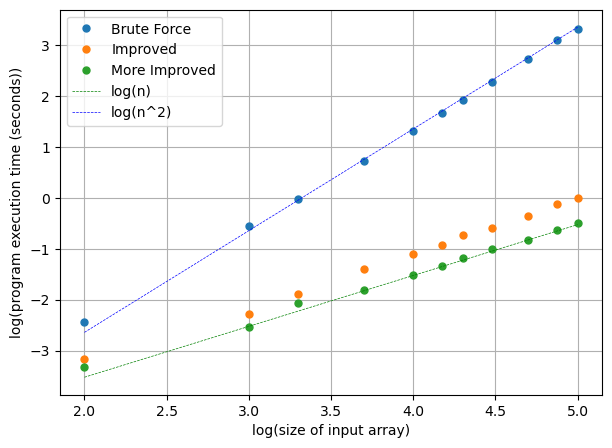

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# parameters of linear regression line
#lin_fit = [c[0]*n for n in stats_n]

log_n = [np.log10(n) for n in stats_n] 
log_T_brute_force = [np.log10(T) for T in stats_T_brute_force] 
log_T_improved = [np.log10(T) for T in stats_T_improved] 
log_T_more_improved = [np.log10(T) for T in stats_T_more_improved] 
T_fit = [logn-2.2+log_T_more_improved[0] for logn in log_n]
T_square_fit = [2.0*logn-4.2+log_T_brute_force[0] for logn in log_n]


plt.figure(figsize=(7,5))
plt.plot(log_n, log_T_brute_force, 'o', markersize= 5, label = 'Brute Force')
plt.plot(log_n, log_T_improved, 'o', markersize= 5, label = 'Improved')
plt.plot(log_n, log_T_more_improved, 'o', markersize= 5, label = 'More Improved')
plt.plot(log_n, T_fit, 'g--', linewidth = 0.5, label = 'log(n)')
plt.plot(log_n, T_square_fit, 'b--', linewidth = 0.5, label = 'log(n^2)')
plt.xlabel("log(size of input array)")
plt.ylabel("log(program execution time (seconds))")
plt.legend()
plt.grid()
plt.show()

This plot shows the `logarithm of program execution time on the vertical axis` and `logarithm of input size on the horizontal axis` with data from three different two-sum algorithms. The blue dashed line corresponds to `logarithm of n^2` and the green dashed line corresponds to `logarithm of n`. The data points from the `brute force algorithm` clearly coincide with the blue dashed line confirming that the theoretical worst-case time complexity is `O(n^2)`. Whereas, the data points from the `more improved algorithm` can be seen to clearly coincide with the green dashed line confirming that the theoretical worst-case time complexity of `O(n)`. The `improved algorithm` which has theoretical worst-case time complexity of `O(n logn)` can be clearly seen to be in the intermediate region between the green and blue dashed lines.   